In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
dir = "/content/drive/MyDrive/IIITD/Winter 2021/ML/my_vgg16/"

Mounted at /content/drive


In [ ]:
import torch
import torchvision
import torch.nn as NN
import torchvision.datasets as datasets
from torch.utils.data import (
    DataLoader,
)

In [ ]:
import pickle

In [ ]:
from torchvision import transforms
train_transform = transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ColorJitter(),
        transforms.RandomRotation(degrees=20),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor(),
        transforms.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])  # CIFAR10 standards (found online on  https://forums.fast.ai/t/calculating-our-own-image-stats-imagenet-stats-cifar-stats-etc/40355)
    ])
test_transform = transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),s
        transforms.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])  # CIFAR10 standards (found online on  https://forums.fast.ai/t/calculating-our-own-image-stats-imagenet-stats-cifar-stats-etc/40355)
    ])

train_dataset = datasets.CIFAR10(root = "CIFAR10/train",train = True,transform=train_transform ,download = True)
test_dataset = datasets.CIFAR10(root = "CIFAR10/test",train = False,transform=test_transform,download = True)


Files already downloaded and verified
Files already downloaded and verified


In [ ]:
len(train_dataset)

50000

In [ ]:
train_data_len = int(0.8 * len(train_dataset))
train_indices = list(range(len(train_dataset)))
train_dataset_sampler = train_indices[:train_data_len]
valid_dataset_sampler = train_indices[train_data_len:]

In [ ]:
train_loaded = DataLoader(dataset=train_dataset, batch_size=128,sampler = train_dataset_sampler)
valid_loaded = DataLoader(dataset=train_dataset, batch_size=128,sampler = valid_dataset_sampler)
test_loaded  = DataLoader(dataset=test_dataset, batch_size=128, shuffle=True)


In [ ]:
#Loading pretrained model
vgg16 = torchvision.models.vgg16(pretrained=True)

In [ ]:
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
for layers in vgg16.parameters():
    layers.requires_grad = False

In [ ]:
new_classifier = NN.Sequential(NN.Linear(in_features=25088, out_features=4096, bias=True),
  NN.ReLU(inplace=True),
  NN.Dropout(p=0.5, inplace=False),
  NN.Linear(in_features=4096, out_features=4096, bias=True),
  NN.ReLU(inplace=True),
  NN.Dropout(p=0.5, inplace=False),
  NN.Linear(in_features=4096, out_features=1024, bias=True),
  NN.ReLU(inplace=True),
  NN.Dropout(p=0.5, inplace=False),
  NN.Linear(in_features=1024, out_features=10, bias=True),    
)
vgg16.classifier = new_classifier

In [ ]:
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
# vgg16.to(torch.device("cuda"))
vgg16.load_state_dict(torch.load(f'{dir}/vgg16_my_3_cpu'))
# vgg16.to(torch.device("cpu"))
# torch.save(vgg16.state_dict(), f'{dir}/vgg16_my_100_cpu')

<All keys matched successfully>

In [ ]:
# train1 = open(f'{dir}training_loss',"rb")
# valid1 = open(f'{dir}validation_loss',"rb")

# training_loss = pickle.load(train1)
# validation_loss = pickle.load(valid1)
# train1.close()
# valid1.close()

In [ ]:
loss_function = NN.CrossEntropyLoss()
solver = torch.optim.Adam(vgg16.parameters(), lr=0.0001)
gpu_cpu = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
import numpy as np
from tqdm import  tqdm_notebook

In [ ]:
# vgg16.to(gpu_cpu)
# training_loss = []
# validation_loss = []
for epoch in tqdm_notebook(range(100)):
  loss = np.zeros(len(train_loaded))
  valid_loss = np.zeros(len(valid_loaded))
  
  for count,batch in enumerate(train_loaded):
    # print(batch[0].shape)
    X = batch[0]
    X = X.to(gpu_cpu)
    y = batch[1]
    y = y.to(gpu_cpu)

    predictions = vgg16(X)
    cur_loss = loss_function(predictions,y)
    loss[count] = cur_loss.item()
    solver.zero_grad()
    cur_loss.backward()
    solver.step()
  vgg16.eval()
  count=0
  for count,val_batch in enumerate(valid_loaded):
    X = val_batch[0]
    X = X.to(gpu_cpu)
    y = val_batch[1]
    y = y.to(gpu_cpu)
    predictions = vgg16(X)
    cur_loss = loss_function(predictions,y)
    valid_loss[count] = cur_loss.item()   
  vgg16.train()
  # print(loss)
  # print(valid_loss)
  print(f"Epoch {epoch} : Loss : {loss.mean()}")
  print(f"Epoch {epoch} : Loss : {valid_loss.mean()}")
  training_loss.append(loss.mean())
  validation_loss.append(valid_loss.mean()) 
  if(count % 20 ==0):
    train = open(f'{dir}training_loss{count}',"wb")
    valid = open(f'{dir}validation_loss{count}',"wb")

    pickle.dump(training_loss,train)
    pickle.dump(validation_loss,valid)
    train.close()
    valid.close()
    torch.save(vgg16.state_dict(), f'{dir}/vgg16_my_{count}')
    plt.figure(figsize=(6,6))
    plt.plot(range(len(training_loss)), training_loss, label = "Training  Loss")
    plt.plot(range(len(validation_loss)), validation_loss, label = "Validation  Loss" )
    plt.xlabel('Number of Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(f"{dir}my_vg16_{count}.png")


In [ ]:
ls "/content/drive/MyDrive/IIITD/Winter 2021/ML/my_vgg16/"

my_vg162.png  training_loss   validation_loss   vgg16_my
my_vg163.png  training_loss2  validation_loss2  vgg16_my2
my_vg16.png   training_loss3  validation_loss3  vgg16_my3


In [ ]:
import pickle
train = open(f'{dir}training_loss_100',"wb")
valid = open(f'{dir}validation_loss_100',"wb")

pickle.dump(training_loss,train)
pickle.dump(validation_loss,valid)
train.close()
valid.close()

In [ ]:
torch.save(vgg16.state_dict(), f'{dir}/vgg16_my_100')

In [ ]:
def get_predictions(loaded_data, vgg16):
    vgg16.eval()
    predicted_labels = []
    original_labels = []
    with torch.no_grad():
        for x, y in tqdm_notebook(loaded_data):
          original_labels.extend(y)
          x = x.to(device=gpu_cpu)
          y = y.to(device=gpu_cpu)
          y_pred_probab = vgg16(x)
          y_pred = torch.max(y_pred_probab,1)[1]
          predicted_labels.extend(y_pred)
    vgg16.train()
    return(original_labels,predicted_labels)


In [ ]:
y_orig,y_pred = get_predictions(test_loaded,vgg16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


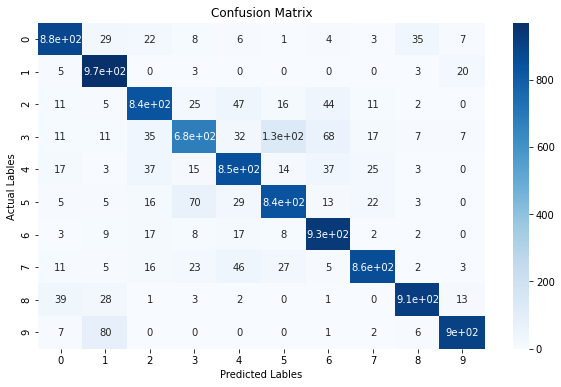

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_orig, y_pred), annot=True,cmap="Blues")
plt.xlabel("Predicted Lables")
plt.ylabel("Actual Lables")
plt.title("Confusion Matrix")
plt.savefig("Confusion_matrix")
plt.show()

In [27]:
from sklearn.metrics import multilabel_confusion_matrix
class_wise_confu_matrix = multilabel_confusion_matrix(y_orig, y_pred,labels=[0,1,2,3,4,5,6,7,8,9])

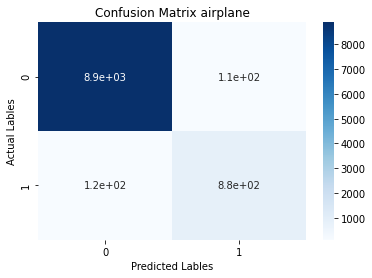

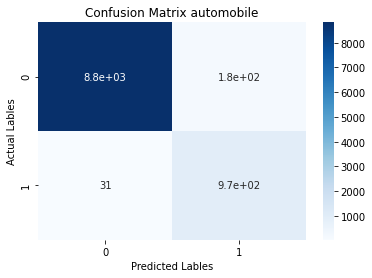

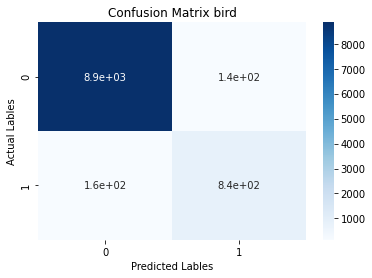

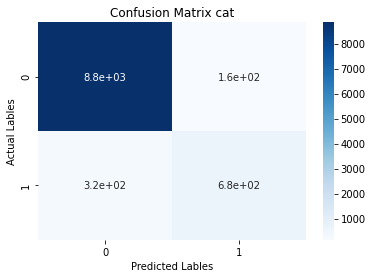

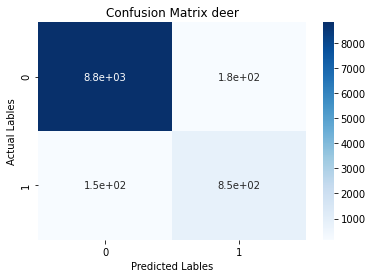

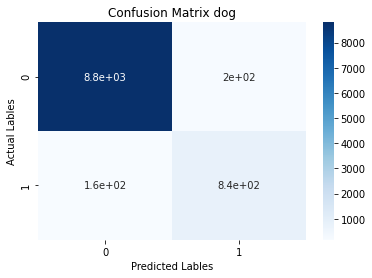

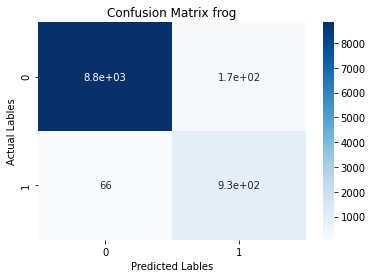

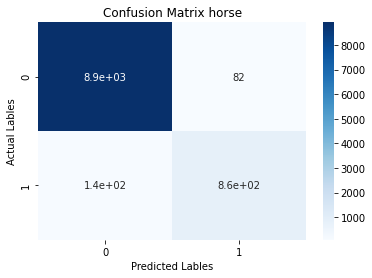

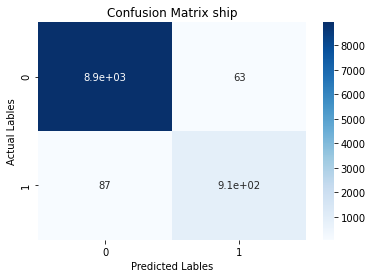

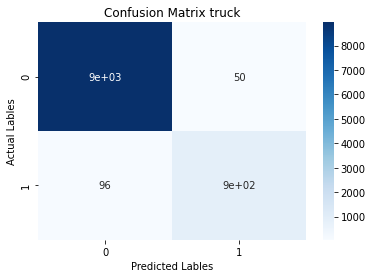

In [58]:
target_names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
for count,i in enumerate(class_wise_confu_matrix):
  sns.heatmap(i, annot=True,cmap="Blues")
  plt.xlabel("Predicted Lables")
  plt.ylabel("Actual Lables")
  plt.title(f"Confusion Matrix {target_names[count]}")
  plt.savefig(f"Confusion_matrix_{target_names[count]}")
  plt.show()

In [61]:
for count,i in enumerate(class_wise_confu_matrix): 
  print("Class",target_names[count],":",(i[1][1])/1000)

Class airplane : 0.885
Class automobile : 0.969
Class bird : 0.839
Class cat : 0.679
Class deer : 0.849
Class dog : 0.837
Class frog : 0.934
Class horse : 0.862
Class ship : 0.913
Class truck : 0.904


In [64]:
for count,i in enumerate(class_wise_confu_matrix): 
  print((i[1][1])/1000,end=",")

0.885,0.969,0.839,0.679,0.849,0.837,0.934,0.862,0.913,0.904,

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_orig, y_pred, target_names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]))

              precision    recall  f1-score   support

    airplane       0.89      0.89      0.89      1000
  automobile       0.85      0.97      0.90      1000
        bird       0.85      0.84      0.85      1000
         cat       0.81      0.68      0.74      1000
        deer       0.83      0.85      0.84      1000
         dog       0.81      0.84      0.82      1000
        frog       0.84      0.93      0.89      1000
       horse       0.91      0.86      0.89      1000
        ship       0.94      0.91      0.92      1000
       truck       0.95      0.90      0.93      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_orig, y_pred)

0.8671

In [ ]:
import pickle
y_orig_ptr = open(f'{dir}y_orig_3',"wb")
y_pred_ptr = open(f'{dir}y_pred_3',"wb")

pickle.dump(y_orig,y_orig_ptr)
pickle.dump(y_pred,y_pred_ptr)
y_orig_ptr.close()
y_pred_ptr.close()

In [ ]:
torch.save(vgg16.state_dict(), f'{dir}/vgg16_my')

In [ ]:
vgg16_new = torchvision.models.vgg16(pretrained=True)
vgg16_new.classifier[6] = NN.Linear(4096,10)
vgg16_new.load_state_dict(torch.load("./saved_model"))


<All keys matched successfully>

In [ ]:
train1 = open(f'{dir}training_loss',"rb")
valid1 = open(f'{dir}validation_loss',"rb")

a = pickle.load(train1)
b= pickle.load(valid1)
train1.close()
valid1.close()

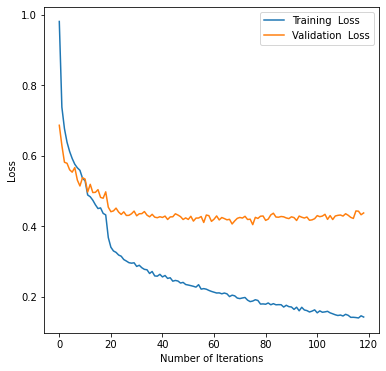

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.plot(range(len(training_loss)), training_loss, label = "Training  Loss")
plt.plot(range(len(validation_loss)), validation_loss, label = "Validation  Loss" )
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.legend()
plt.savefig(f"{dir}my_vg16_100.png")